In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles 

In [4]:
np.random.seed(42)
X , y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)

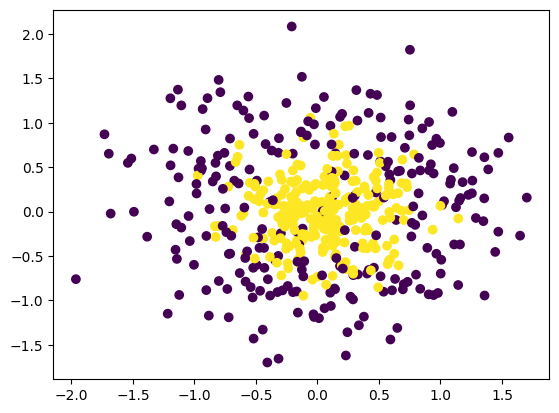

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
# Training withous hyperparameter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


In [11]:
abc = AdaBoostClassifier()
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.812)

In [12]:
abc.fit(X,y)

AdaBoostClassifier()

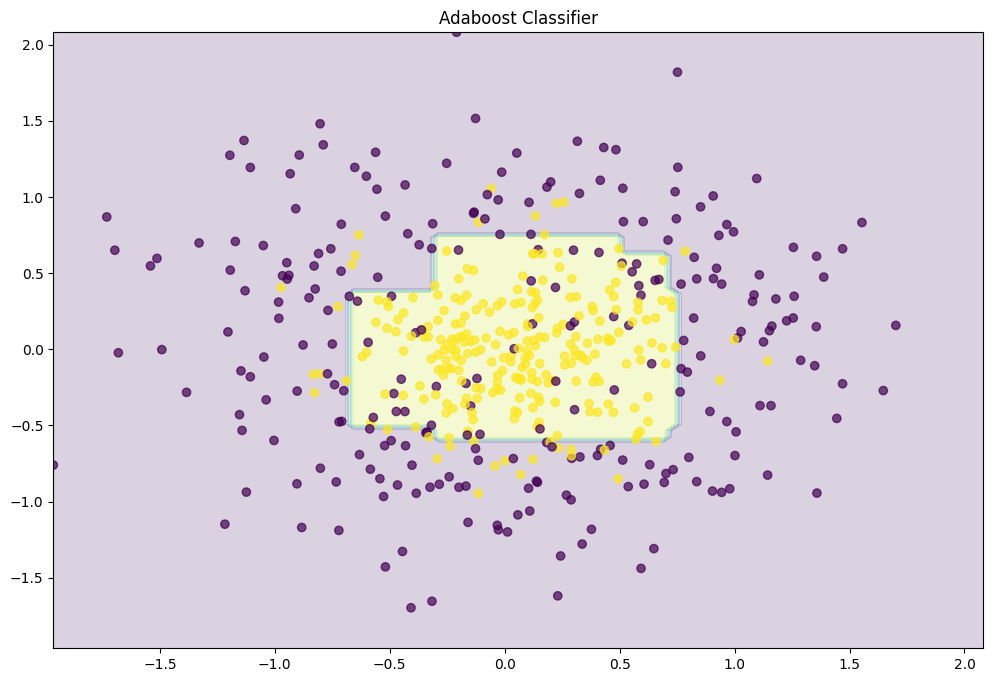

In [20]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range = np.linspace(X.min(),X.max(),100)
    xx1 , xx2 =np.meshgrid(x_range,x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_hat,alpha=.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(abc)

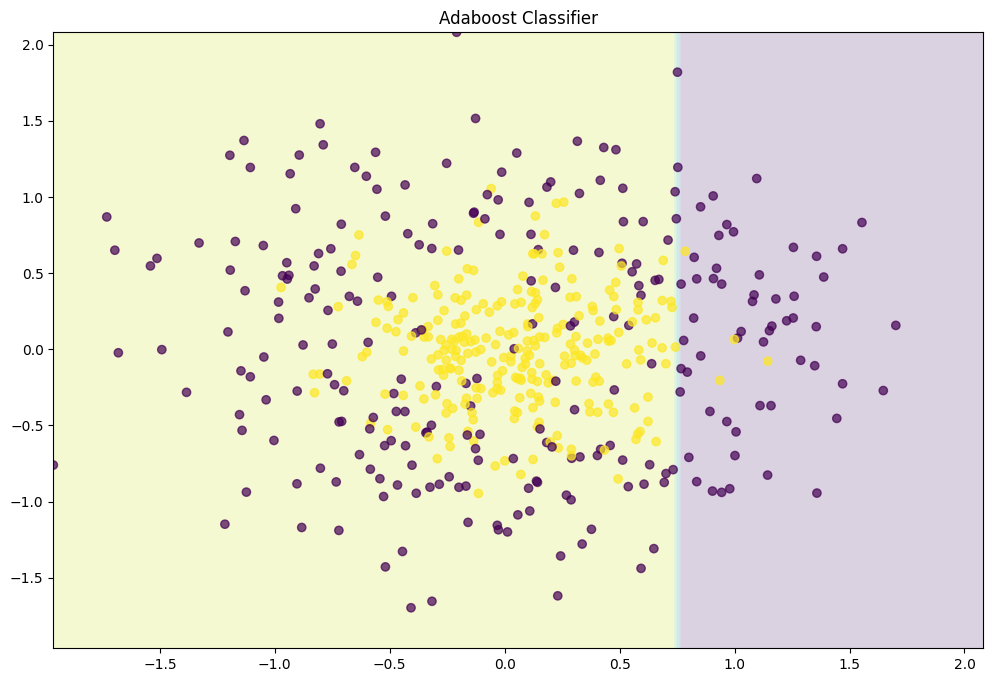

In [21]:
# Hyperparameter Tuning
# Taking the Decsion Stumps 1 
abc = AdaBoostClassifier(n_estimators=1)
abc.fit(X,y)
plot_decision_boundary(abc)

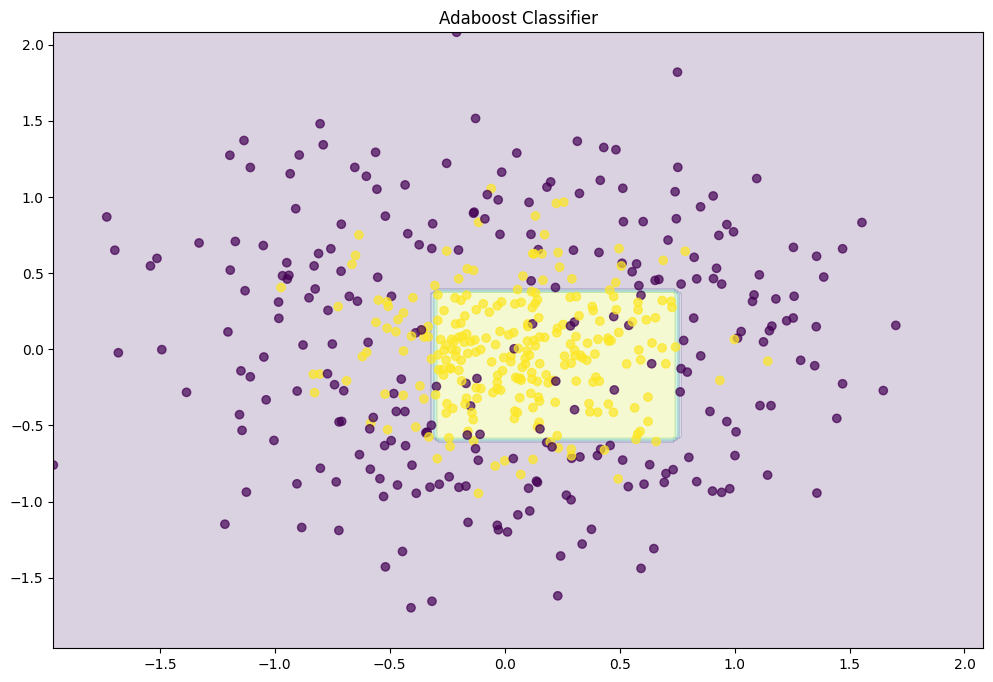

In [23]:
abc = AdaBoostClassifier(n_estimators=10)
abc.fit(X,y)
plot_decision_boundary(abc)

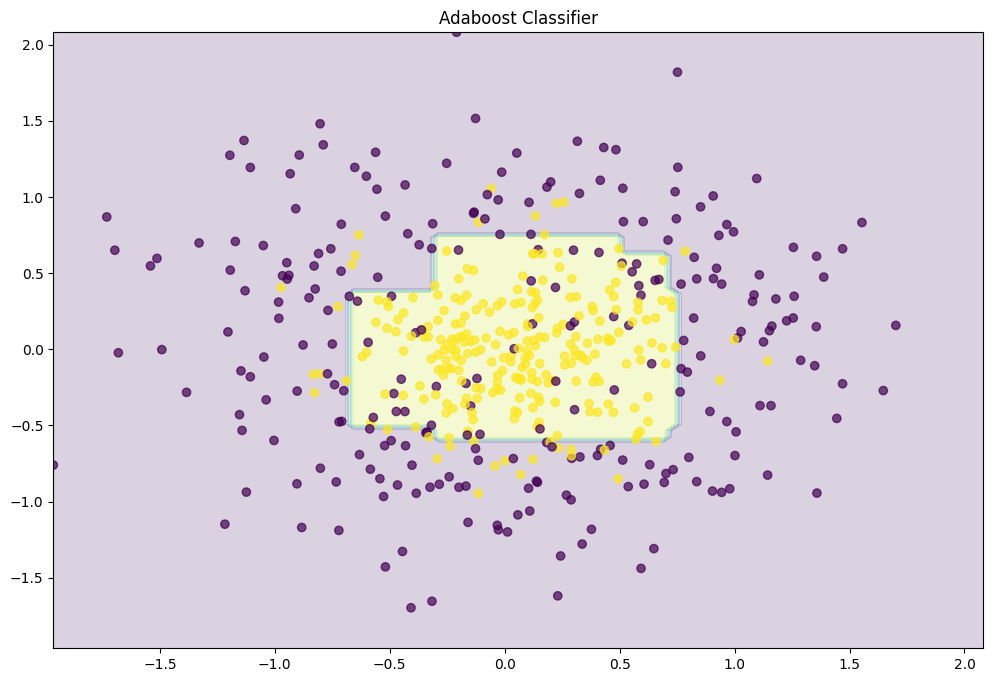

In [24]:
abc = AdaBoostClassifier(n_estimators=50)
abc.fit(X,y)
plot_decision_boundary(abc)

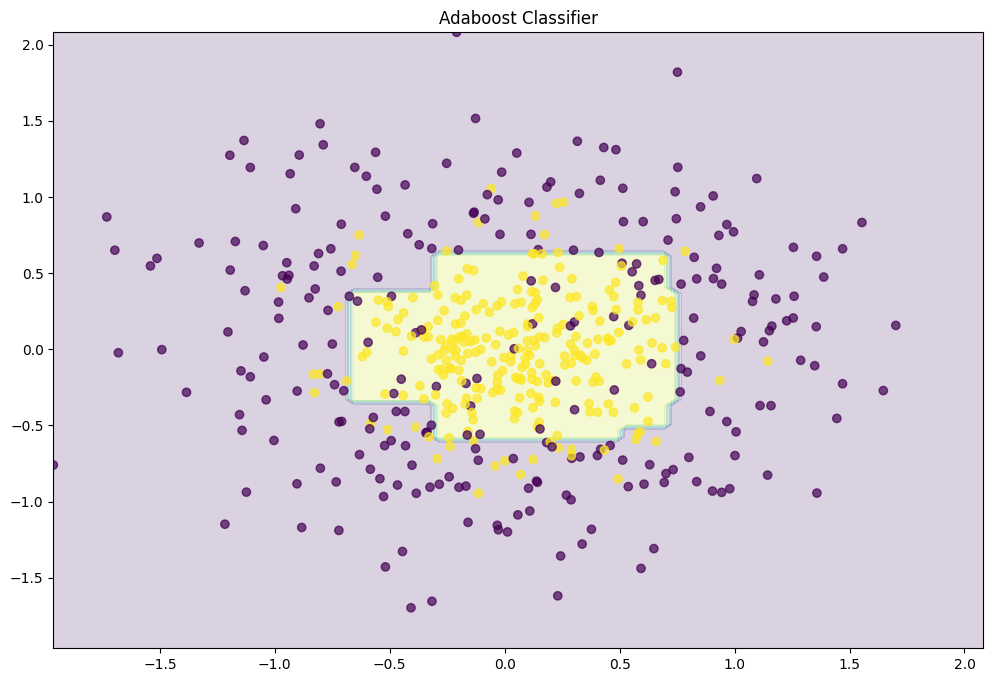

In [26]:
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X,y)
plot_decision_boundary(abc)

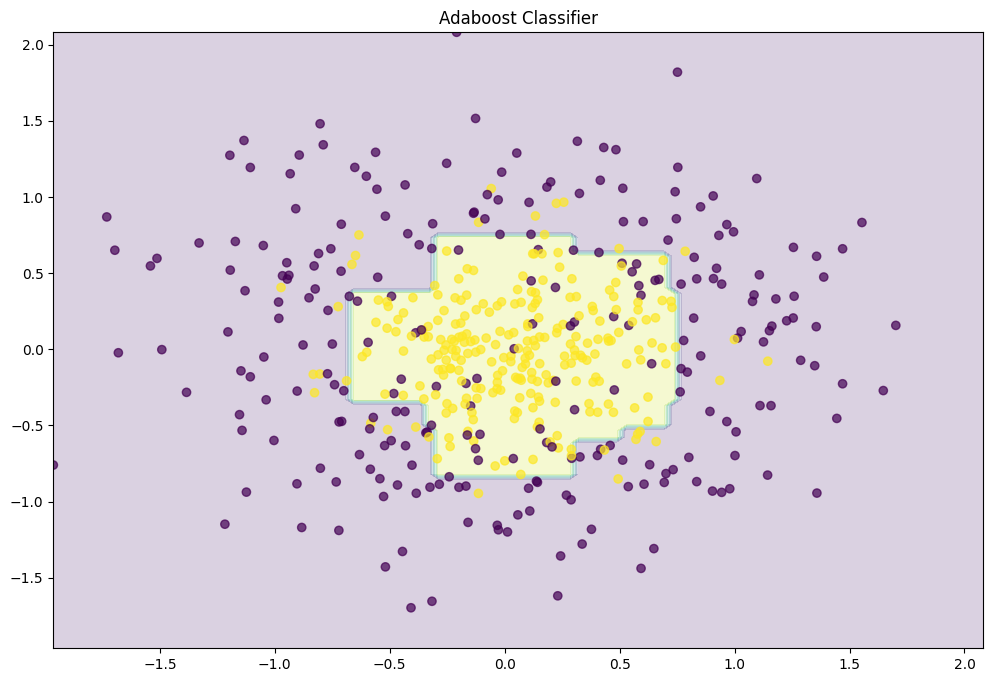

In [27]:
abc = AdaBoostClassifier(n_estimators=150)
abc.fit(X,y)
plot_decision_boundary(abc)

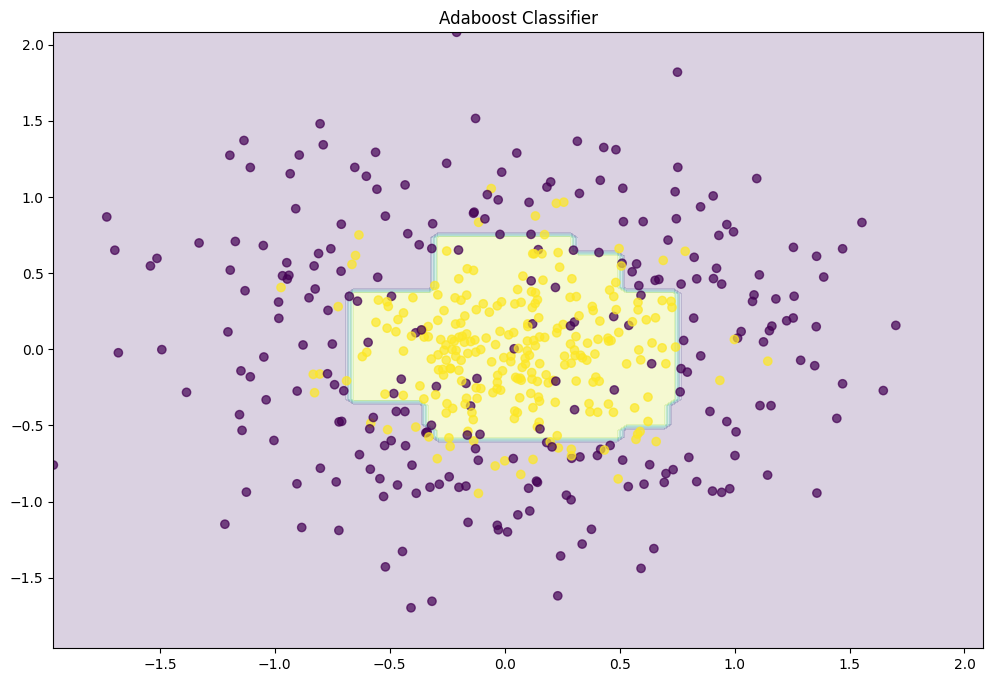

In [28]:
abc = AdaBoostClassifier(n_estimators=500)
abc.fit(X,y)
plot_decision_boundary(abc)

In [ ]:
# Learning Rate (bydefault=1)

In [31]:
# Gridsearch CV
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] =[0.0001,0.001,0.01,0.1,1.0]
grid['algorithm'] = ['SAMME','SAMME.R']
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')
#Execute the grid search
grid_result = grid_search.fit(X,y)
# Summarize the best score and configuration
print("Best : %f using %s"%(grid_result.best_score_,grid_result.best_params_))

C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Best : 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
